In [1]:
import torch
import torchvision 
import torchvision.transforms as T 

import torchmetrics

from PIL import Image

In [2]:
transform = T.ToPILImage()

In [15]:
mask = torch.zeros(1,164,164)
pred = torch.zeros(1,2,164,164)

In [16]:
mask[:, 2:3 ] = 1
pred[:, 1, 2:3 ] = 1

mask[:, 8:9 ] = 1
pred[:, 1, 9:10 ] = 1

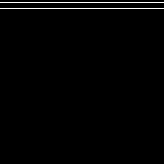

In [17]:
transform(mask)

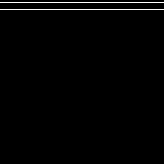

In [22]:
transform(pred[:, 1])

In [32]:
def AP(pred, mask, pos_label=None, matching_distance=1):
    if pred.shape[1] == 2: # binary case
        pred = pred[:, pos_label]

    if matching_distance > 1:
        kernel = torch.ones(mask.shape[0], matching_distance, matching_distance)
        mask = torch.nn.functional.conv2d(mask.unsqueeze(0), kernel.unsqueeze(0), padding='same')
        mask = torch.clip(mask, 0, 1).squeeze(0)

    if pred.shape != mask.shape:
        pass

    TP = ((pred == 1) & (mask == 1)).sum()
    FP = ((pred == 1) & (mask == 0)).sum()
    precision = TP / (TP+FP)
    return precision


In [33]:
pred_batch = torch.vstack((pred, pred, pred))
mask_batch = torch.vstack((mask, mask, mask))

In [34]:
ap = AP(pred_batch, mask_batch, pos_label=1, matching_distance=1)
ap

tensor(0.5000)